In [29]:
import time
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

class VacuumCleanerAgent:
    def __init__(self, num_rows: int, num_cols: int, dirty_rooms: list, initial_charge: int ):

        if len(dirty_rooms) > num_rows * num_cols:
            raise ValueError("Number of dirty rooms cannot be greater than the total number of rooms.")
        
        self.rooms = [[(i, j) for j in range(1, num_cols + 1)] for i in range(1, num_rows + 1)]
        
        self.dirty_rooms = dirty_rooms
        self.num_rows = num_rows
        self.num_cols = num_cols
        self.current_position = (1, 1)
        self.cleaned_rooms= []
        self.action_memory = []
        self.charge = initial_charge
        
    
        self.charge_levels = [self.charge]
        self.initial_charge = initial_charge
        
        self.cost=0
        
 
    def clean_room(self, position: tuple):
        
        if position in self.dirty_rooms:
            self.dirty_rooms.remove(position)
            self.cleaned_rooms.append(position)  
            print(f"Room {position} cleaned.")
            self.cost+=1
            movement = (position, " room is cleaned")
            self.action_memory.append(movement)
        else:
            print(f"Room {position} is already clean.")
            
    def mess_room(self, position: tuple):
        
        if position in self.cleaned_rooms:
            self.cleaned_rooms.remove(position)
            self.dirty_rooms.append(position)  
            print(f"Room {position} messed.")
        else:
            print(f"Room {position} is already dirty.")
                          
    
    def print_movement(self, direction):
        movements = {
            'right': "Sağa gittim",
            'left': "Sola gittim"
        }
        print(movements.get(direction, "Bilinmeyen hareket yönü"))

  
        
    def act(self):
    
        if self.current_position in self.dirty_rooms:
            self.clean_room(self.current_position)
            print(f"Current Position: {self.current_position}")
        else:            
            next_position = None

            if self.current_position[1] < len(self.rooms[0]):
                next_position = (self.current_position[0], self.current_position[1] + 1)        
            elif self.current_position[1] > 1:
                next_position = (self.current_position[0], self.current_position[1] - 1)
            print("self.current_position= ", self.current_position)
            print("self.next_position= ", next_position)
            if next_position:
                if next_position[1] > self.current_position[1]:
                    self.action_memory.append("Move to right")
                    self.print_movement('right')
                else:
                    self.action_memory.append("Move to left")
                    self.print_movement('left')
                self.current_position = next_position
                print(f"Moving to room {self.current_position}.")
                print(f"{self.current_position} odasına hareket ediliyor.")      
        self.charge-=1
        self.charge_levels.append(self.charge)
        if self.charge == 1:
            print("Critical charge level!!")
        elif self.charge ==0 :
            self.move_to_charging_station()
    

    def station (self, num):
        if num==0:
            self.mess_room((1,1))
        elif num==1: 
            self.mess_room((1,2))
        elif num==2:
            self.mess_room((1,1))
            self.mess_room((1,2))
            
        
    def move_to_charging_station(self):
        print("Returning to charging station...")
        self.charge = self.initial_charge
        print(f"Charging completed. Current charge level: {self.charge}")

            
    def visualize(self):
        room_labels = [[f'({i}, {j})' for j in range(1, len(self.rooms[0]) + 1)] for i in range(1, len(self.rooms) + 1)]
        room_status = [[0 for j in range(len(self.rooms[0]))] for i in range(len(self.rooms))]

    
        for i in range(len(self.rooms)):
            for j in range(len(self.rooms[0])):
                if (i+1, j+1) in self.dirty_rooms:
                    room_status[i][j] = 0
                else:
                    room_status[i][j] = 1

        
        fig, ax = plt.subplots()
        ax.matshow(room_status, cmap='viridis')

        
        for i in range(len(self.rooms)):
            for j in range(len(self.rooms[0])):
                ax.text(j, i, room_labels[i][j], va='center', ha='center', fontsize=8, color='black')

        
        for i in range(len(self.rooms)):
            for j in range(len(self.rooms[0])):
                if room_status[i][j] == 0:  
                    ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color='red', alpha=0.6))
                elif room_status[i][j] == 1:  
                    ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color='green', alpha=0.6))
        
        
        x, y = self.current_position[1] - 1, self.current_position[0] - 1
        ax.plot(x, y, marker='x', markersize=10, color='blue')
        plt.show()
        
        
        fig, ax2 = plt.subplots()
        ax2.plot(range(len(self.charge_levels)), self.charge_levels, marker='o', linestyle='-', color='violet')
        ax2.set_xlabel('Zaman Adımları')
        ax2.set_ylabel('Şarj Seviyesi')
        ax2.set_title('Zaman İçinde Şarj Seviyesi')
        plt.show()
        
               


vacuum_agent = VacuumCleanerAgent(1, 2, [(1, 1), (1, 2) ],  initial_charge=3)


'\nvacuum_agent.visualize()\nvacuum_agent.move_to_next_room()\nvacuum_agent.visualize()\ntime.sleep(5)\nvacuum_agent.visualize()\nvacuum_agent.move_to_next_room()\nvacuum_agent.visualize()\n\nprint("Cleaned Rooms:", vacuum_agent.cleaned_rooms)\ncost = len(vacuum_agent.cleaned_rooms)\nprint(f"Cost: {cost}")\n'

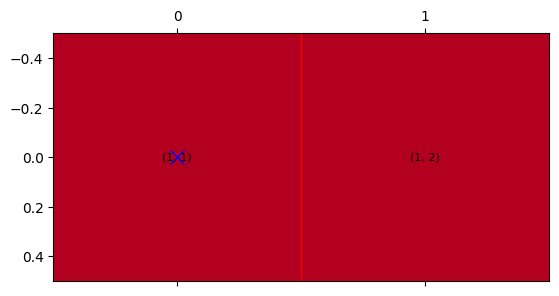

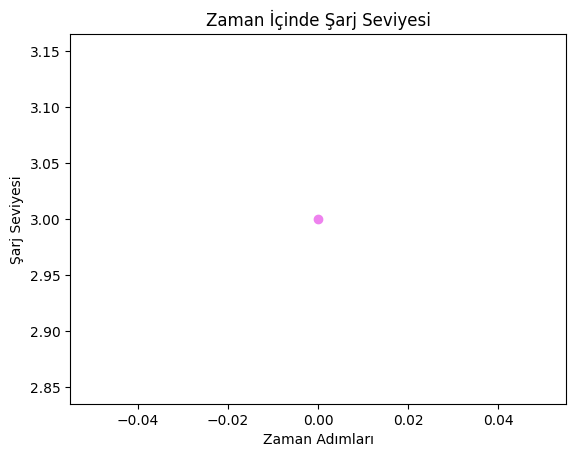

Room (1, 1) cleaned.
Current Position: (1, 1)
(1, 1)


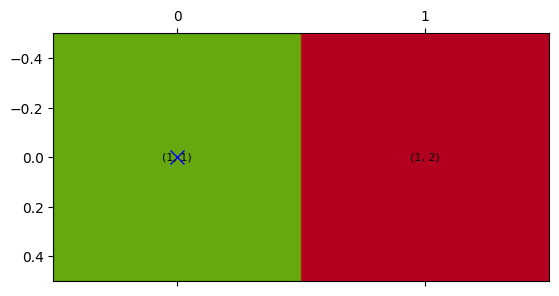

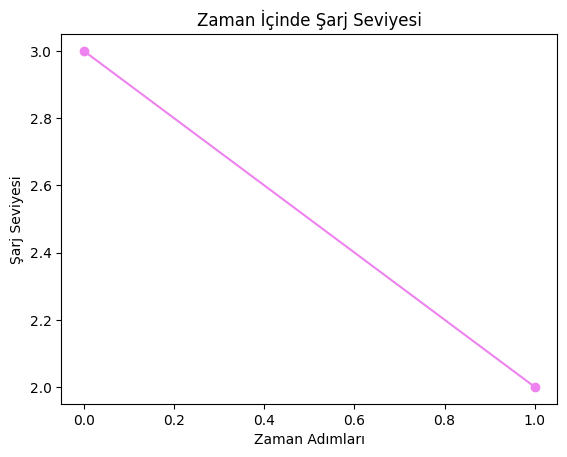

self.current_position=  (1, 1)
self.next_position=  (1, 2)
Sağa gittim
Moving to room (1, 2).
(1, 2) odasına hareket ediliyor.
Critical charge level!!
(1, 2)


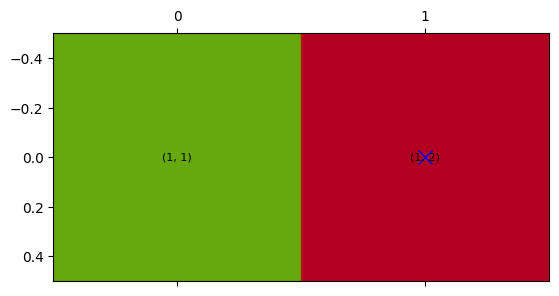

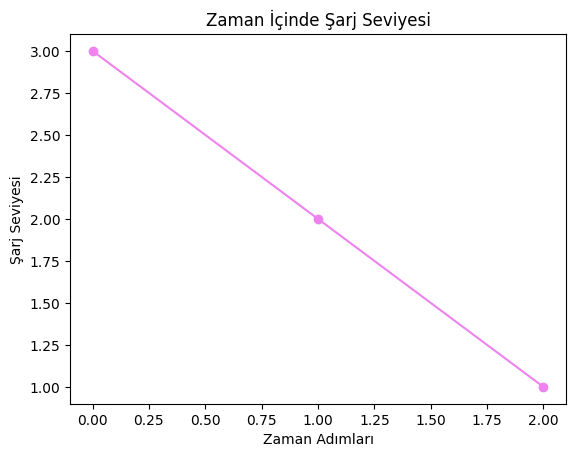

Room (1, 2) cleaned.
Current Position: (1, 2)
Returning to charging station...
Charging completed. Current charge level: 3
(1, 2)
Room (1, 1) messed.


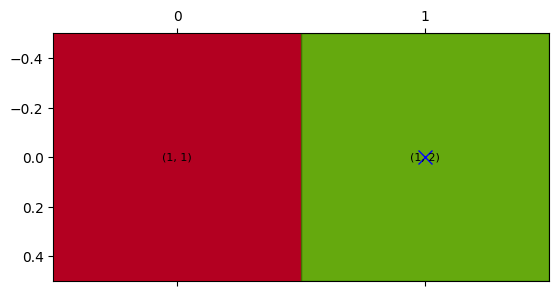

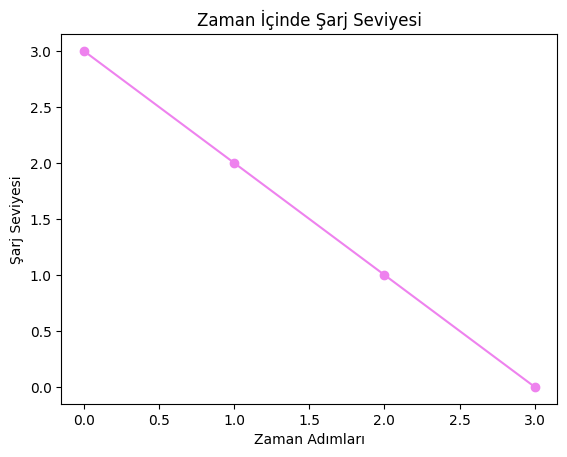

self.current_position=  (1, 2)
self.next_position=  (1, 1)
Sola gittim
Moving to room (1, 1).
(1, 1) odasına hareket ediliyor.
(1, 1)


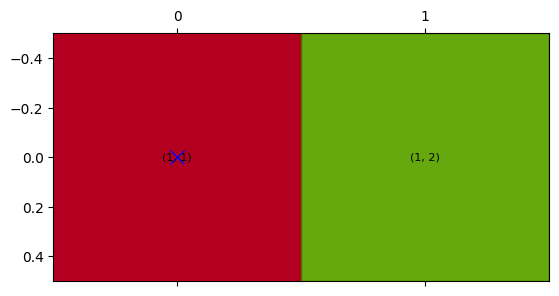

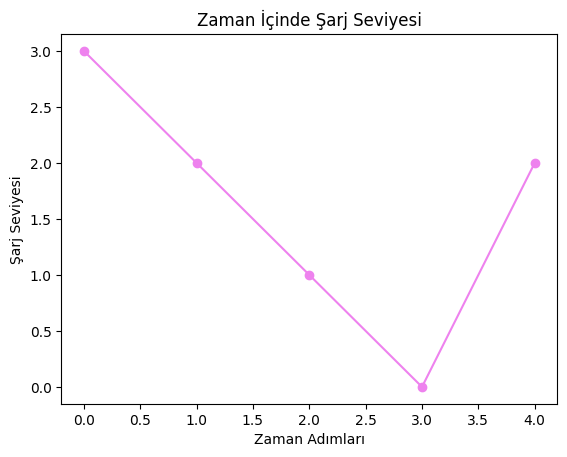

Room (1, 1) cleaned.
Current Position: (1, 1)
Critical charge level!!
(1, 1)


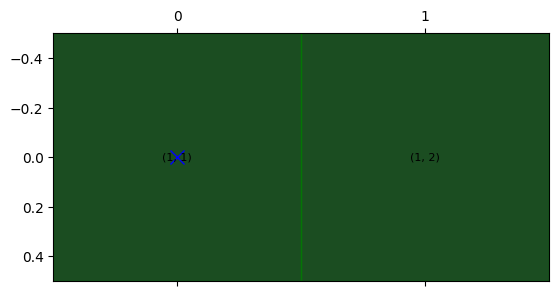

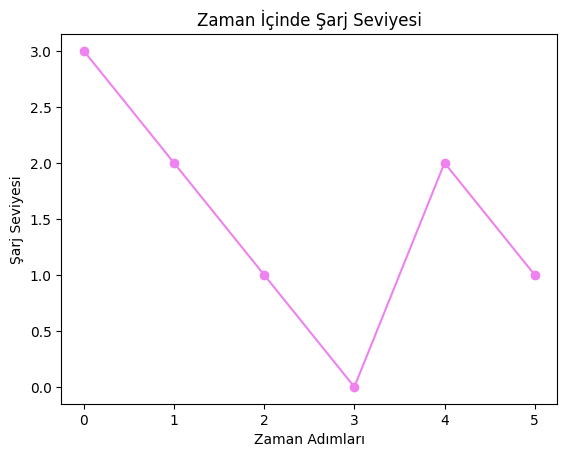

self.current_position=  (1, 1)
self.next_position=  (1, 2)
Sağa gittim
Moving to room (1, 2).
(1, 2) odasına hareket ediliyor.
Returning to charging station...
Charging completed. Current charge level: 3
(1, 2)


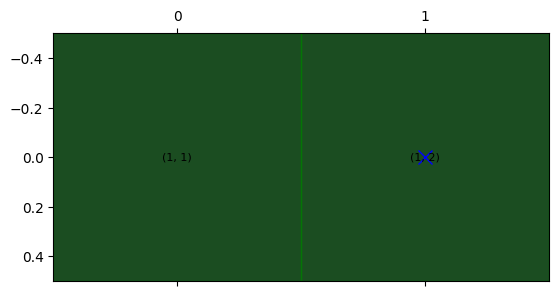

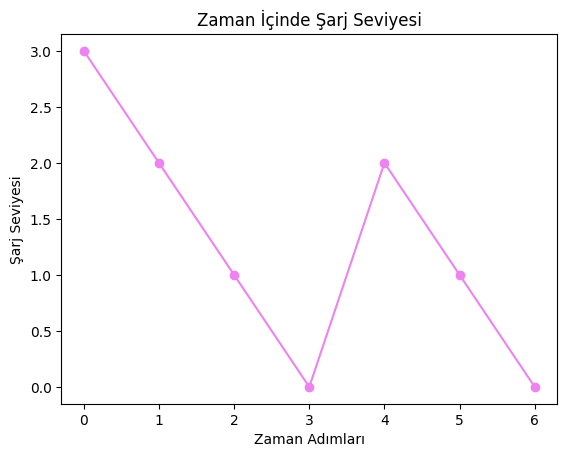

self.current_position=  (1, 2)
self.next_position=  (1, 1)
Sola gittim
Moving to room (1, 1).
(1, 1) odasına hareket ediliyor.
(1, 1)
Room (1, 1) messed.
Room (1, 2) messed.


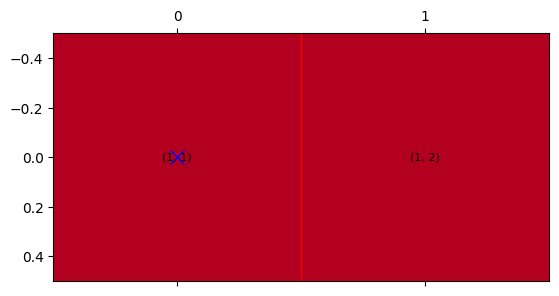

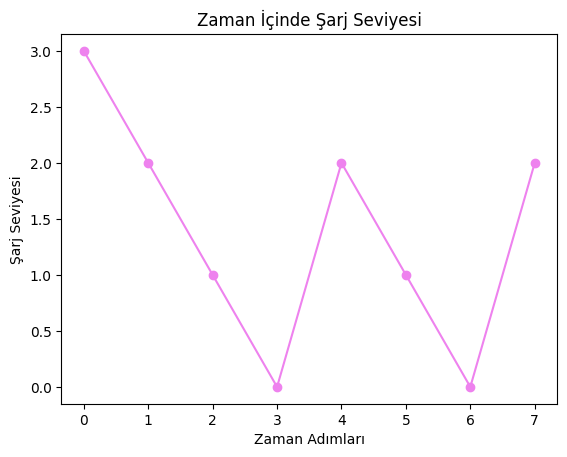

Room (1, 1) cleaned.
Current Position: (1, 1)
Critical charge level!!
(1, 1)


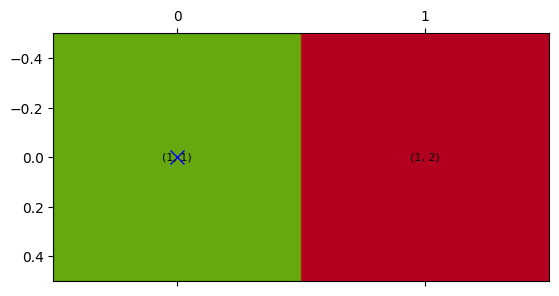

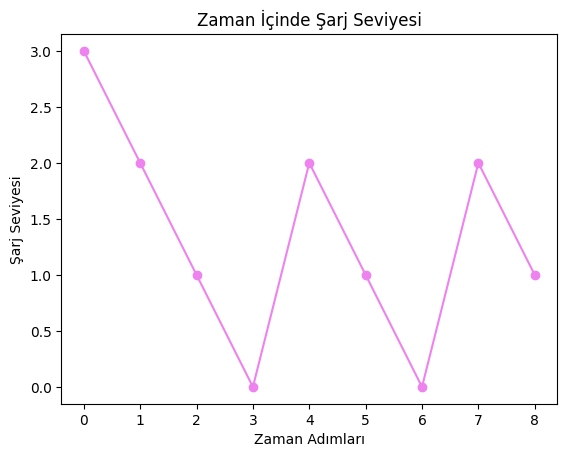

self.current_position=  (1, 1)
self.next_position=  (1, 2)
Sağa gittim
Moving to room (1, 2).
(1, 2) odasına hareket ediliyor.
Returning to charging station...
Charging completed. Current charge level: 3
(1, 2)


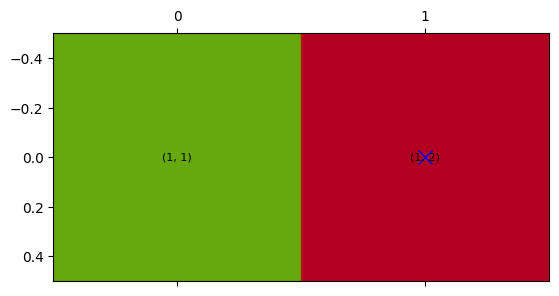

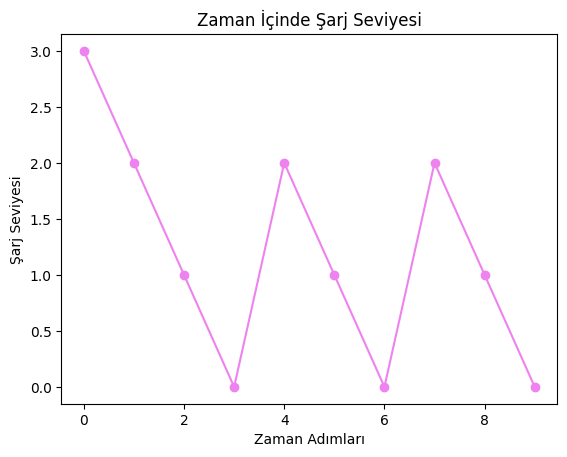

Room (1, 2) cleaned.
Current Position: (1, 2)
(1, 2)


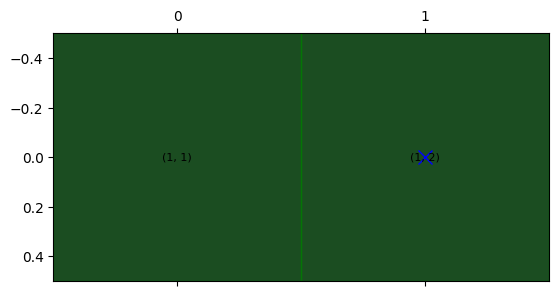

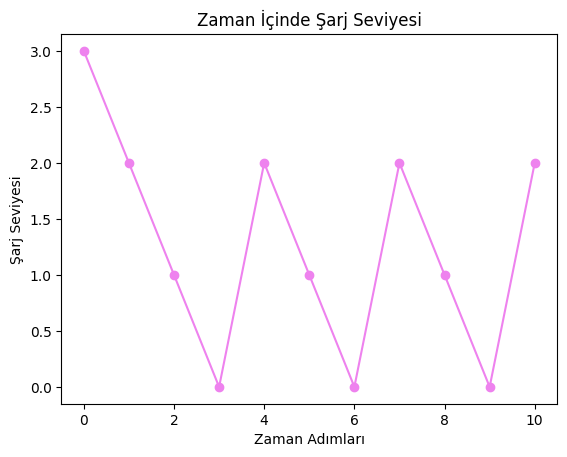

self.current_position=  (1, 2)
self.next_position=  (1, 1)
Sola gittim
Moving to room (1, 1).
(1, 1) odasına hareket ediliyor.
Critical charge level!!
(1, 1)
Room (1, 1) messed.


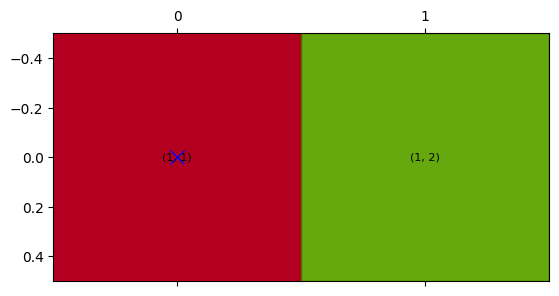

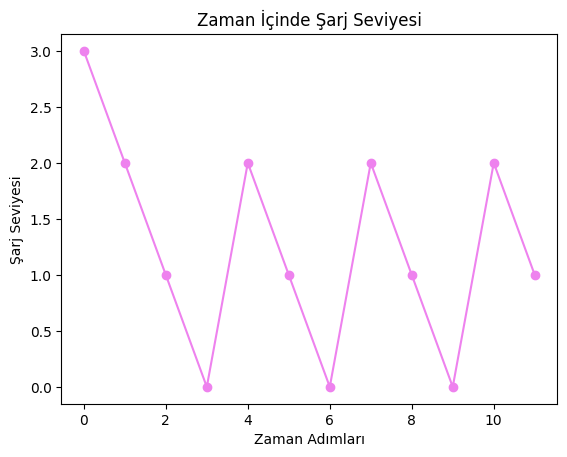

Room (1, 1) cleaned.
Current Position: (1, 1)
Returning to charging station...
Charging completed. Current charge level: 3
(1, 1)


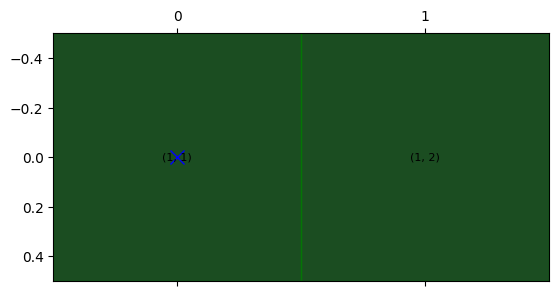

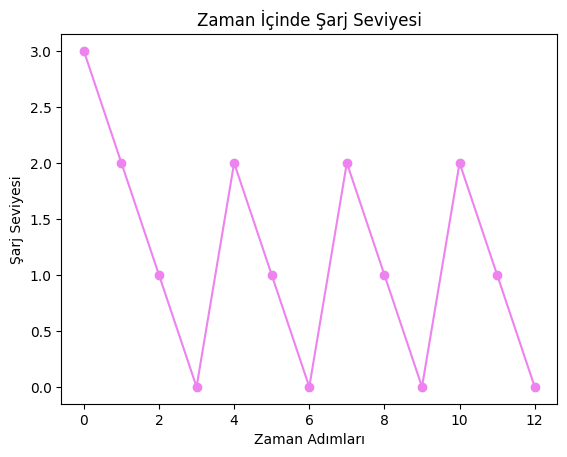

self.current_position=  (1, 1)
self.next_position=  (1, 2)
Sağa gittim
Moving to room (1, 2).
(1, 2) odasına hareket ediliyor.
(1, 2)


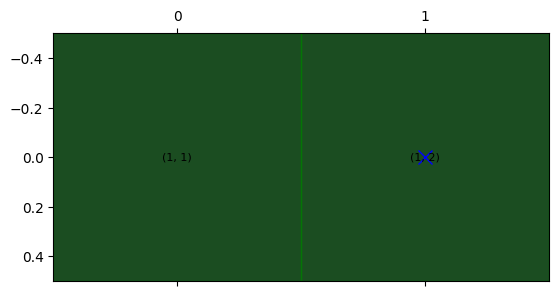

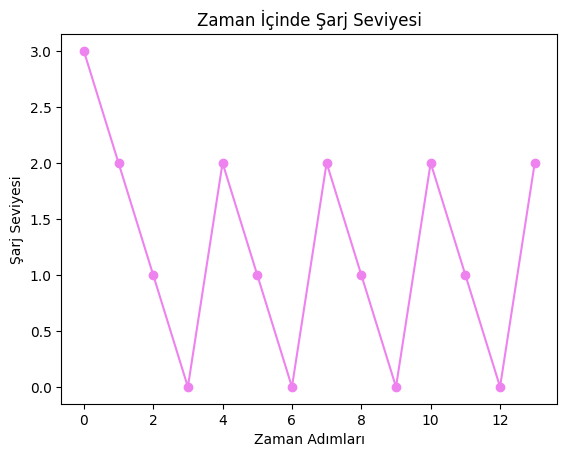

self.current_position=  (1, 2)
self.next_position=  (1, 1)
Sola gittim
Moving to room (1, 1).
(1, 1) odasına hareket ediliyor.
Critical charge level!!
(1, 1)


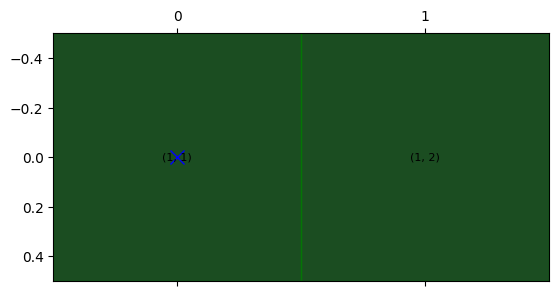

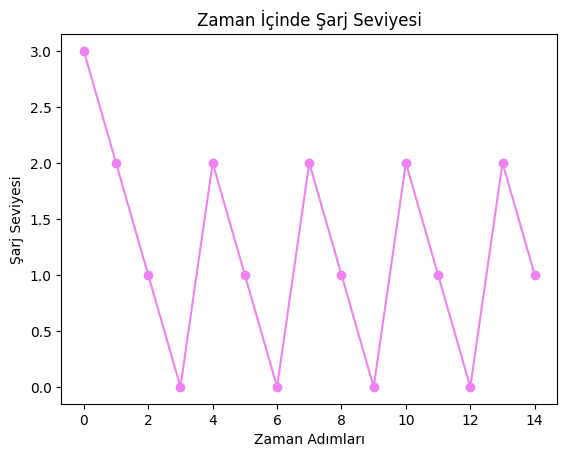

self.current_position=  (1, 1)
self.next_position=  (1, 2)
Sağa gittim
Moving to room (1, 2).
(1, 2) odasına hareket ediliyor.
Returning to charging station...
Charging completed. Current charge level: 3
(1, 2)


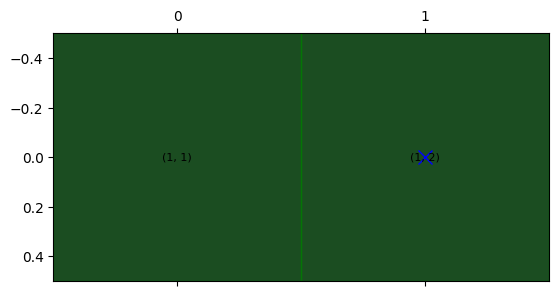

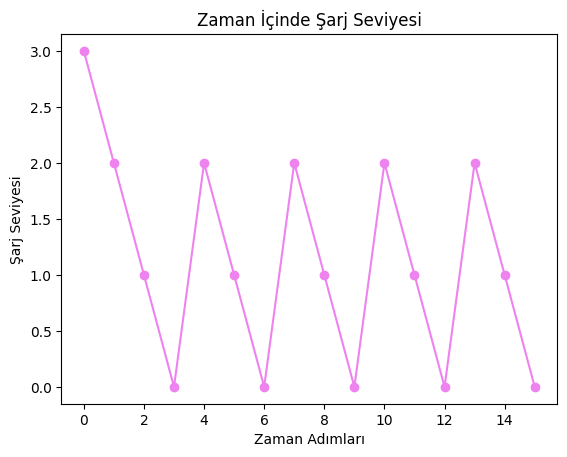

self.current_position=  (1, 2)
self.next_position=  (1, 1)
Sola gittim
Moving to room (1, 1).
(1, 1) odasına hareket ediliyor.
(1, 1)


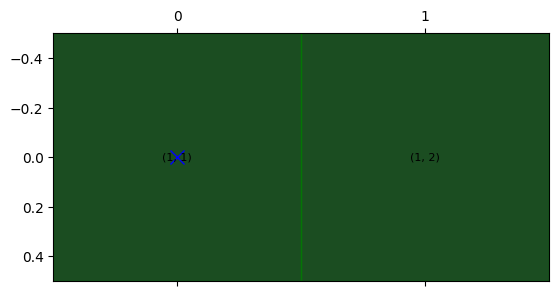

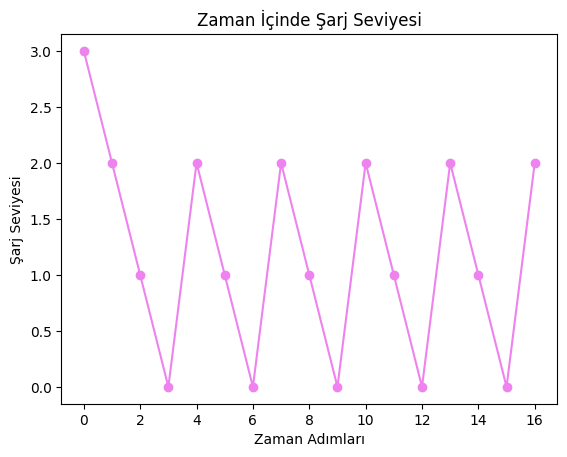

self.current_position=  (1, 1)
self.next_position=  (1, 2)
Sağa gittim
Moving to room (1, 2).
(1, 2) odasına hareket ediliyor.
Critical charge level!!
(1, 2)


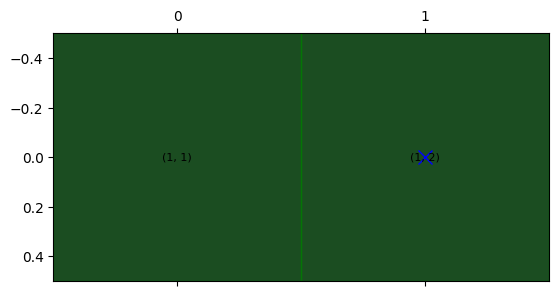

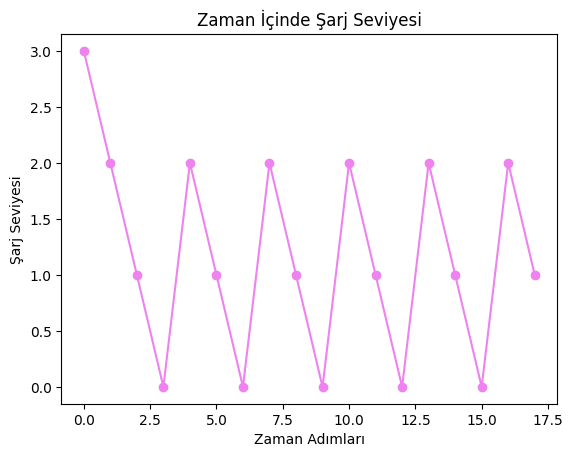

self.current_position=  (1, 2)
self.next_position=  (1, 1)
Sola gittim
Moving to room (1, 1).
(1, 1) odasına hareket ediliyor.
Returning to charging station...
Charging completed. Current charge level: 3
(1, 1)


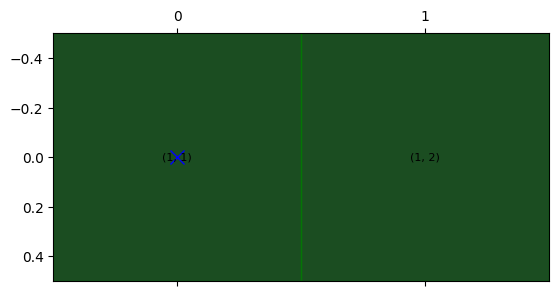

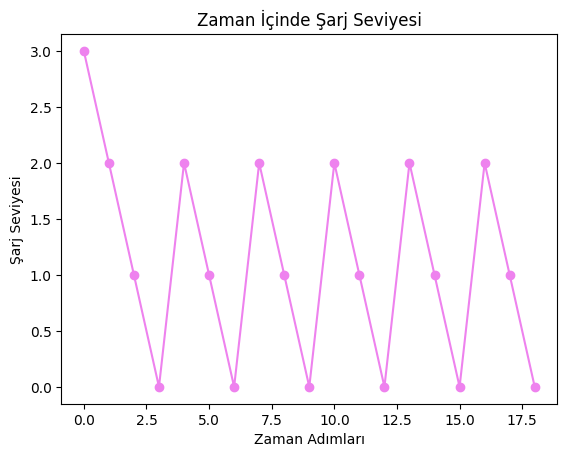

self.current_position=  (1, 1)
self.next_position=  (1, 2)
Sağa gittim
Moving to room (1, 2).
(1, 2) odasına hareket ediliyor.
(1, 2)
Room (1, 1) messed.


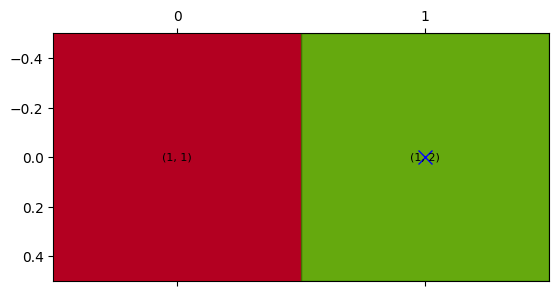

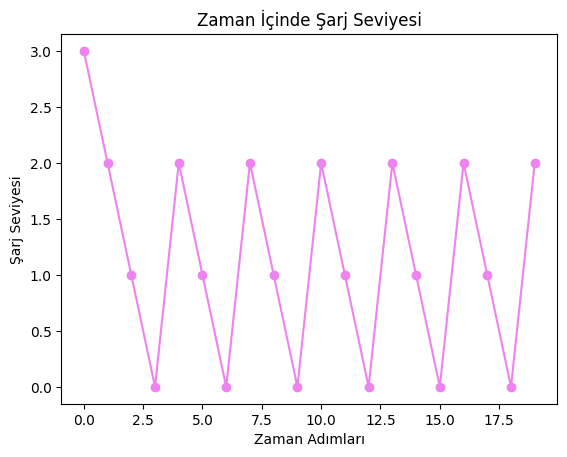

self.current_position=  (1, 2)
self.next_position=  (1, 1)
Sola gittim
Moving to room (1, 1).
(1, 1) odasına hareket ediliyor.
Critical charge level!!
(1, 1)
Cost: 6


In [30]:
x=20
y=0
while x > 0:
    x-=1
    y+=1
    if y==4:
        num= random.randint(0,3)
        vacuum_agent.station(num)
        y=0
    
    vacuum_agent.visualize()
    vacuum_agent.act()
    time.sleep(1)
    print(vacuum_agent.current_position)
    
print(f"Cost: {vacuum_agent.cost}")

In [31]:
vacuum_agent.action_memory

[((1, 1), ' room is cleaned'),
 'Move to right',
 ((1, 2), ' room is cleaned'),
 'Move to left',
 ((1, 1), ' room is cleaned'),
 'Move to right',
 'Move to left',
 ((1, 1), ' room is cleaned'),
 'Move to right',
 ((1, 2), ' room is cleaned'),
 'Move to left',
 ((1, 1), ' room is cleaned'),
 'Move to right',
 'Move to left',
 'Move to right',
 'Move to left',
 'Move to right',
 'Move to left',
 'Move to right',
 'Move to left']